In [1]:
from rdkit.Chem import Draw
from rdkit import Chem

In [2]:
import os
os.chdir('../programming_scripts/.')
print(os.getcwd())

from MS2LDA_core import run_lda
from MS2LDA_core import predict_with_lda

from MS2LDA_core import load_mgf
from MS2LDA_core import clean_spectra

from utils import motifs2spectra
from spec2vec import Spec2Vec

from FP_annotation import annotate_motifs
from Substructure_retrieval import retrieve_substructures

import heapq

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\programming_scripts


In [3]:
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-COLLECTIONS-PESTICIDES-POSITIVE.mgf"
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE.mgf"
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-SCIEX-LIBRARY.mgf"
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\MEDUSA\notebooks\MS2LDA\PDE5_standards_annotated_pos_unique.mgf"
spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\_removeMeAfterCheck\Project_TEATRO\processed_data\_processed_data1\EFSA_Tab_B_extension_massbank_positive.mgf"

In [246]:
lda_model, corpus, id2word = run_lda(spectra_path=spectra_path, num_motifs=88, iterations=100)

In [247]:
motif_spectra = motifs2spectra(lda_model)

[ 46.97  59.98  72.1   78.99  82.94 124.98 142.99 152.2  182.08 199.
 239.4  374.09]
TOP 3 frags:  [(374.09, 1.0), (142.99, 0.560907654334154), (82.94, 0.4652679063099573)]
TOP 3 losses:  [(209.96, 0.46505409809336395), (173.99, 0.31434046403390303), (169.93, 0.2500155698869158)]


(<Figure size 1600x1200 with 1 Axes>,
 <Axes: title={'center': 'Spectrum'}, xlabel='m/z', ylabel='Intensity'>)

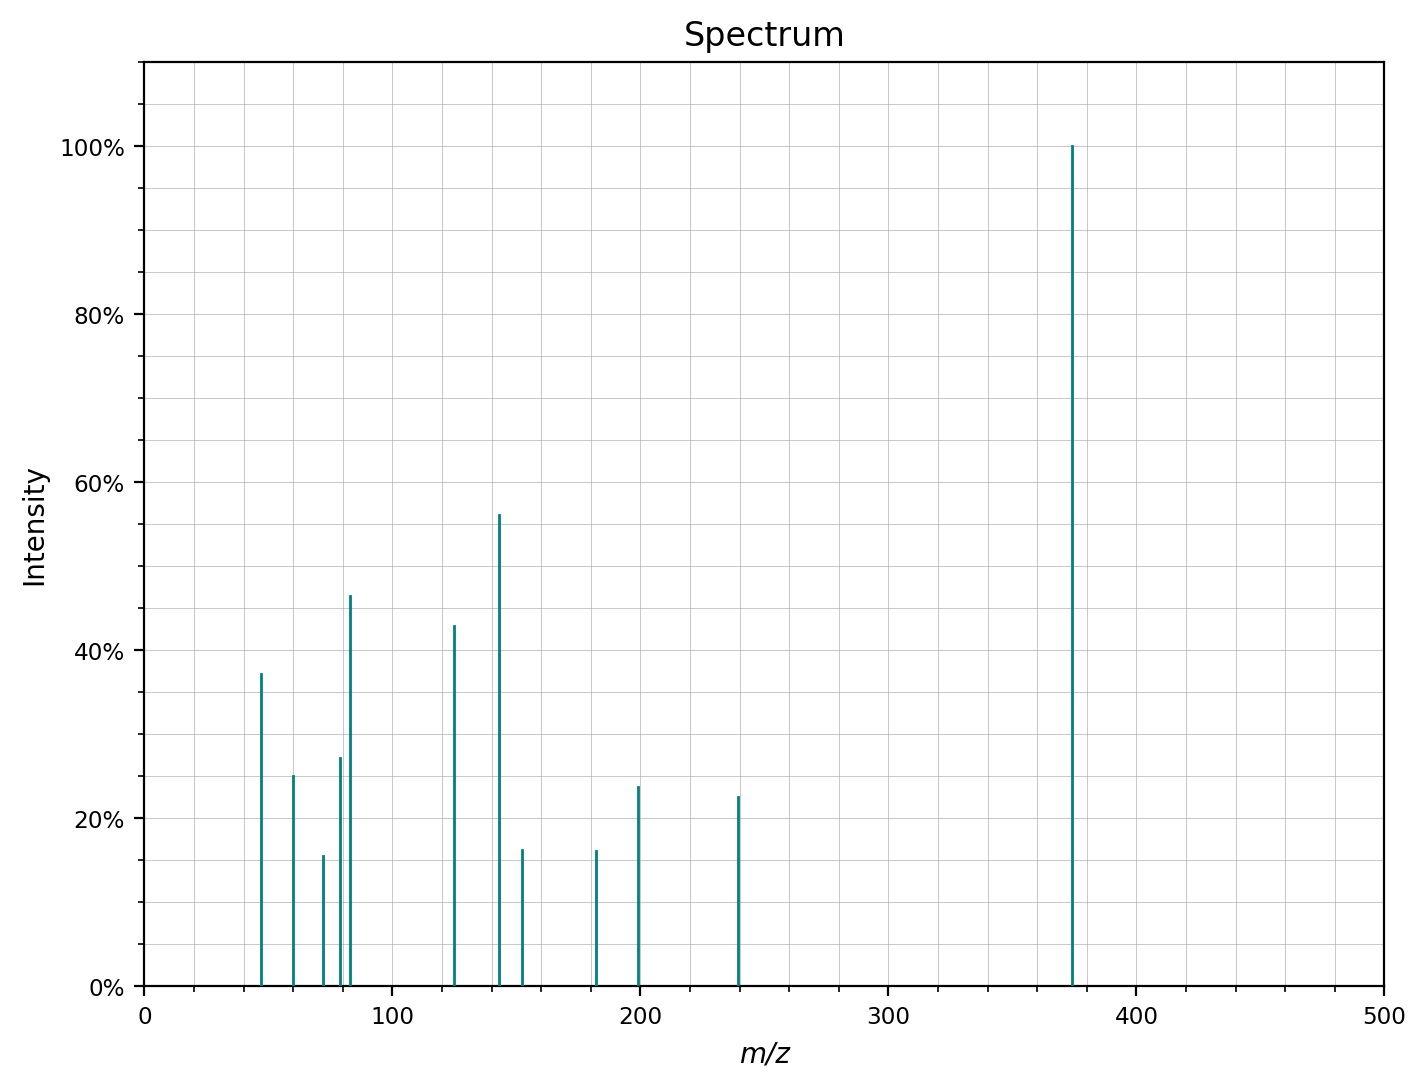

In [248]:
i = 4
print(motif_spectra[i].peaks.mz)
print("TOP 3 frags: ", heapq.nlargest(3, list(zip(motif_spectra[i].peaks.mz, motif_spectra[i].peaks.intensities)), key = lambda x: x[1]))
print("TOP 3 losses: ", heapq.nlargest(3, list(zip(motif_spectra[i].losses.mz, motif_spectra[i].losses.intensities)), key = lambda x: x[1]))
motif_spectra[i].plot()

In [253]:
for spec in motif_spectra:
    print(max(spec.losses.intensities))

0.5229383259755496
0.5538028399139383
0.8389577106726616
0.7876398213810986
0.46505409809336395
1.0335812795807655
0.9519265774152319
0.7698033175989962
0.7289574201307415
0.3899234922464716
0.846685748644793
0.6844400201068888
0.5019386732705838
0.3716941857346537
0.565096548327919
0.22907071823865713
0.7015724132217509
0.737129685817358
0.2141806873229429
0.5366309263995932
0.8194923483696293
0.5763605002096217
0.5053155832614282
0.7607499050746268
1.0063795655172527
0.8864020075315407
0.3444743067282159
0.4097255700143297
0.4546340897994018
0.8629315092494102
0.724142568126096
0.5847073077964411
0.395445922407606
0.3780136656604348
0.48201627263488267
0.8048045093248974
0.46683117261737395
0.3128165900489205
0.4219471425190445
0.954630313522474
0.36732751064467234
0.8115583685162523
0.3624754302738061
0.3449567927176094
1.095963023996358
0.523782678754387
0.2730763398546652
0.6929369226817705
1.626465854985097
0.7088956101253099
0.470844583209436
0.5363861526365148
0.740217231436713

In [241]:
#smiles_per_motifs, predicted_motifs, predicted_motifs_distribution, spectra_per_motifs = predict_with_lda(lda_model, spectra_path, id2word)

### Motif analysis

In [242]:
from Spec2Vec_annotation import load_model_and_data
from Spec2Vec_annotation import calc_similarity
from Spec2Vec_annotation import retrieve_top_hits

In [243]:
s2v_model, embeddings_smiles_DB = load_model_and_data()

In [244]:
smiles = embeddings_smiles_DB.smiles.to_numpy()
embeddings_DB = embeddings_smiles_DB.embeddings.to_list()
spectra_DB = embeddings_smiles_DB.spectra.to_list()

In [249]:
s2v_scores = calc_similarity(s2v_model, motif_spectra, embeddings_DB)

AssertionError: Weights are not normalized to unity as expected.

In [ ]:
top_scores, top_smiles, top_spectra = retrieve_top_hits(s2v_scores, 22, smiles, spectra_DB)

In [ ]:
top_scores

In [ ]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in top_smiles], molsPerRow=5)

23 looks good. top 3 peaks
27 i should check out
40 check out
41 really interesting
44 check out
45 check out
48 interesting not so good
50 interesting
52 similar to 23

## Fingerprint generation

### adaptive Fingperprint

In [70]:
fps_motifs = annotate_motifs([top_smiles], fp_type="adaptive", threshold=0.70) # if another fp then "adaptive" is used you obviously cannot retrieve substructures from it

[FP]: Executing calc_adaptive


In [71]:
fps_motifs

[array([1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [72]:
substructure_matches = retrieve_substructures(fps_motifs, [top_smiles])

[13:43:18] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4


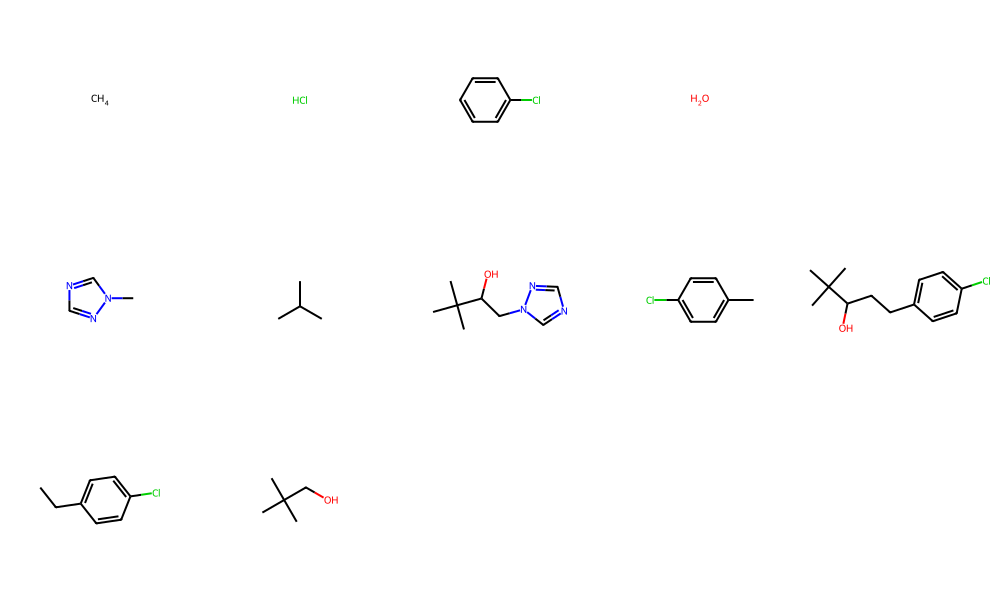

In [73]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in substructure_matches[0]], molsPerRow=5)

### another Fingerprint

In [37]:
fps_motifs = annotate_motifs([top_smiles], fp_type="maccs", threshold=0.73)

[FP]: Executing calc_MACCS


In [38]:
fps_motifs

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.])]